In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#from sklearn.model_selection import GridSearchCV, cross_val_score,train_test_split,cross_validate


In [12]:
pd.set_option('display.max_columns', None)

# Cargar y limpiar los datos

In [13]:
# Se carga el dataset
df = pd.read_csv("hoteles-entrena.csv")
print(df.shape)
df.head()

(61969, 25)


,hotel,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,average_daily_rate,required_car_parking_spaces,total_of_special_requests,arrival_date
0,Resort_Hotel,342,0,0,2,none,BB,PRT,Direct,Direct,0,0,0,C,C,3,No_Deposit,NaN,NaN,0,Transient,0.0,none,0,2015-07-01
1,Resort_Hotel,737,0,0,2,none,BB,PRT,Direct,Direct,0,0,0,C,C,4,No_Deposit,NaN,NaN,0,Transient,0.0,none,0,2015-07-01
2,Resort_Hotel,7,0,1,1,none,BB,GBR,Direct,Direct,0,0,0,A,C,0,No_Deposit,NaN,NaN,0,Transient,75.0,none,0,2015-07-01
3,Resort_Hotel,13,0,1,1,none,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No_Deposit,304.0,NaN,0,Transient,75.0,none,0,2015-07-01
4,Resort_Hotel,14,0,2,2,none,BB,GBR,Online_TA,TA/TO,0,0,0,A,A,0,No_Deposit,240.0,NaN,0,Transient,98.0,none,1,2015-07-01


# Limpieza

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61969 entries, 0 to 61968
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           61969 non-null  object 
 1   lead_time                       61969 non-null  int64  
 2   stays_in_weekend_nights         61969 non-null  int64  
 3   stays_in_week_nights            61969 non-null  int64  
 4   adults                          61969 non-null  int64  
 5   children                        61969 non-null  object 
 6   meal                            61969 non-null  object 
 7   country                         61548 non-null  object 
 8   market_segment                  61969 non-null  object 
 9   distribution_channel            61969 non-null  object 
 10  is_repeated_guest               61969 non-null  int64  
 11  previous_cancellations          61969 non-null  int64  
 12  previous_bookings_not_canceled  

In [14]:
# Nos deshacemos de variables
df.drop(['arrival_date','deposit_type','agent','company','booking_changes','distribution_channel','country'],axis=1, inplace=True)

In [15]:
# Cambiamos de variables caegoricas a numericas
df["required_car_parking_spaces"] = df["required_car_parking_spaces"].astype('category').cat.codes
df["hotel"] = df["hotel"].astype('category').cat.codes
df["children"] = df["children"].astype('category').cat.codes

In [16]:
# Creamos one-hot encoding para las siguientes variables:
df = pd.concat([df, pd.get_dummies(df.meal)], axis=1)
df.drop(['meal'], axis=1, inplace=True)
df = pd.concat([df, pd.get_dummies(df.market_segment)], axis=1)
df.drop(['market_segment'], axis=1, inplace=True)
df = pd.concat([df, pd.get_dummies(df.reserved_room_type)], axis=1)
df.drop(['reserved_room_type'], axis=1, inplace=True)
df = pd.concat([df, pd.get_dummies(df.assigned_room_type)], axis=1)
df.drop(['assigned_room_type'], axis=1, inplace=True)
df = pd.concat([df, pd.get_dummies(df.customer_type)], axis=1)
df.drop(['customer_type'], axis=1, inplace=True)

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61969 entries, 0 to 61968
Data columns (total 48 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           61969 non-null  int8   
 1   lead_time                       61969 non-null  int64  
 2   stays_in_weekend_nights         61969 non-null  int64  
 3   stays_in_week_nights            61969 non-null  int64  
 4   adults                          61969 non-null  int64  
 5   children                        61969 non-null  int8   
 6   is_repeated_guest               61969 non-null  int64  
 7   previous_cancellations          61969 non-null  int64  
 8   previous_bookings_not_canceled  61969 non-null  int64  
 9   days_in_waiting_list            61969 non-null  int64  
 10  average_daily_rate              61969 non-null  float64
 11  required_car_parking_spaces     61969 non-null  int8   
 12  total_of_special_requests       

In [89]:
# Distribuciones

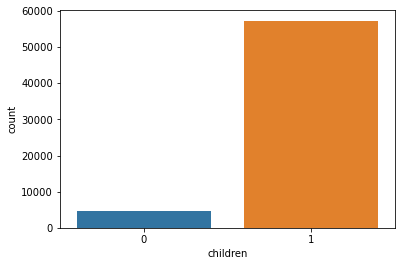

In [17]:
# First target variable alone
sns.countplot(x='children', data=df)
plt.show()

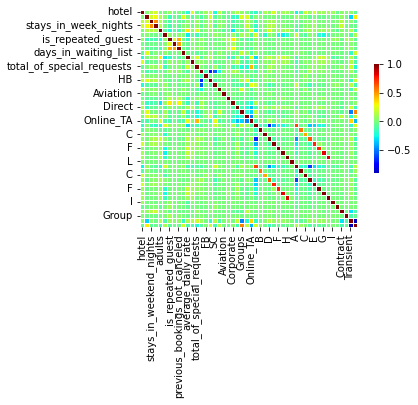

hotel                            -0.010671
lead_time                         0.027671
stays_in_weekend_nights          -0.025207
stays_in_week_nights             -0.019995
adults                           -0.076086
children                          1.000000
is_repeated_guest                 0.040029
previous_cancellations            0.015214
previous_bookings_not_canceled    0.029329
days_in_waiting_list              0.030404
average_daily_rate               -0.280108
required_car_parking_spaces      -0.083064
total_of_special_requests        -0.146437
BB                               -0.026854
FB                               -0.025268
HB                               -0.012394
SC                                0.055022
Undefined                         0.017067
Aviation                          0.012920
Complementary                    -0.000279
Corporate                         0.062813
Direct                           -0.080841
Groups                            0.092073
Offline_TA/

In [18]:
# Let's explore correlations between pairs of variables
corrmat = df.corr()

sns.heatmap(corrmat, center=0, cmap='jet', square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

print(corrmat['children'])

# Separacion

In [19]:
from sklearn.model_selection import train_test_split

df_train,df_test = train_test_split(df,test_size=0.2)
print(df_train.shape)
print(df_test.shape)

#x_train=df_train.drop('children',axis = 1)
#y_train = df_train[['children']]
#print(x_train.shape)
#print(y_train.shape)

#x_test=df_test.drop('children',axis = 1)
#y_test = df_test[['children']]
#print(x_test.shape)
#print(y_test.shape)

(49575, 48)
(12394, 48)


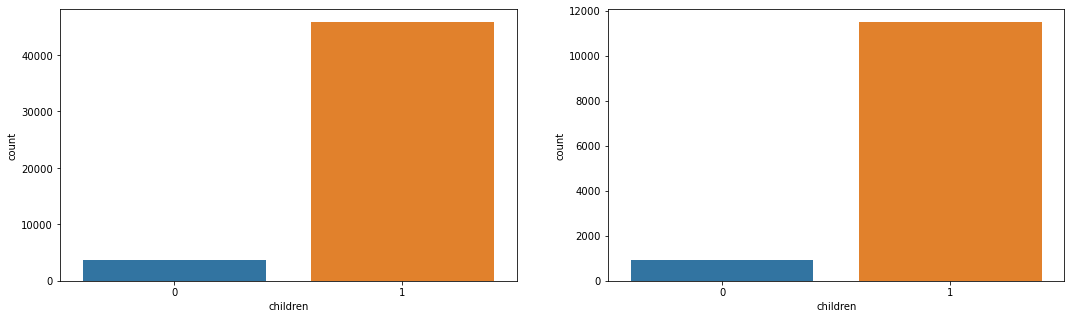

In [20]:
plt.figure(figsize=(18, 5))
plt.subplot(1, 2, 1)
sns.countplot(x='children', data=df_train)
plt.subplot(1, 2, 2)
sns.countplot(x='children', data=df_test)
plt.show()

# Entrenar

In [21]:
x_train=df_train.drop('children',axis = 1).to_numpy()
y_train = df_train[['children']].to_numpy()
print(x_train.shape)
print(y_train.shape)

x_test=df_test.drop('children',axis = 1).to_numpy()
y_test = df_test[['children']].to_numpy()
print(x_test.shape)
print(y_test.shape)

(49575, 47)
(49575, 1)
(12394, 47)
(12394, 1)


In [22]:
from warnings import filterwarnings
filterwarnings('ignore')

In [23]:
# Train a regressor to approximate missing value
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

grid_hyp_params = {'penalty': ['l1', 'l2', 'elastic', 'None'],
                   'C': np.logspace(-7, 4, 6),
                   'l1_ratio': np.arange(0., 1.1, 0.5),
                   'class_weight': ['balanced', 'None']
                  }
gs = GridSearchCV(LogisticRegression(solver='saga'), grid_hyp_params)

gs.fit(x_train, y_train)

print(f"Best score: {gs.best_score_:.3f}")
print(f"Best params: {gs.best_params_}")

Best score: 0.926
Best params: {'C': 0.39810717055349776, 'class_weight': 'None', 'l1_ratio': 0.0, 'penalty': 'l1'}


In [9]:
np.arange(0,1.1,0.5)

array([0. , 0.5, 1. ])

In [25]:
from sklearn.metrics import accuracy_score as acc
print(f"Accuracy on the test set: {acc(gs.best_estimator_.predict(x_test), y_test):.3f}")

Accuracy on the test set: 0.929


In [62]:
predicciones=gs.best_estimator_.predict(x_test), y_test
predicciones[0]

array([1, 1, 1, ..., 1, 1, 1], dtype=int8)

# Datos prueba 

In [55]:
prueba = pd.read_csv("hoteles-prueba.csv")

In [56]:
# Nos deshacemos de variables
prueba.drop(['arrival_date','deposit_type','agent','company','booking_changes','distribution_channel','country'],axis=1, inplace=True)

In [57]:
# Cambiamos de variables caegoricas a numericas
prueba["required_car_parking_spaces"] = prueba["required_car_parking_spaces"].astype('category').cat.codes
prueba["hotel"] = prueba["hotel"].astype('category').cat.codes


In [58]:
# Creamos one-hot encoding para las siguientes variables:
prueba = pd.concat([prueba, pd.get_dummies(prueba.meal)], axis=1)
prueba.drop(['meal'], axis=1, inplace=True)
prueba = pd.concat([prueba, pd.get_dummies(prueba.market_segment)], axis=1)
prueba.drop(['market_segment'], axis=1, inplace=True)
prueba = pd.concat([prueba, pd.get_dummies(prueba.reserved_room_type)], axis=1)
prueba.drop(['reserved_room_type'], axis=1, inplace=True)
prueba = pd.concat([prueba, pd.get_dummies(prueba.assigned_room_type)], axis=1)
prueba.drop(['assigned_room_type'], axis=1, inplace=True)
prueba = pd.concat([prueba, pd.get_dummies(prueba.customer_type)], axis=1)
prueba.drop(['customer_type'], axis=1, inplace=True)

In [63]:
predicciones=gs.best_estimator_.predict(x_test)
predicciones

array([1, 1, 1, ..., 1, 1, 1], dtype=int8)